# Task 8
Scrivere un programma che (a) data una matrice di similarta’subject-subject, (b) un valore n, e (c) un valore m,

- crei un grafo di similarta’, G(V, E), in cui V corresponde all’insieme dei soggetti nel database ed E contiene le coppie di vertici vi, vj per cui vale che , vj e’ uno degli n soggetti piu simili a vi nel database
- identifichi gli m soggetti piu’ significativi nella collezione (utilizzando l’algoritmo di page- rank) .

Link utile: https://www.youtube.com/watch?v=P8Kt6Abq_rM


[[127 133 147 ...  34  32  32]
 [124 137 150 ...  42  41  41]
 [141 149 154 ...  38  39  39]
 ...
 [239 242 246 ...  17  17  17]
 [239 240 245 ...  15  15  15]
 [236 245 242 ...  20  20  20]]
DATA di 0 - prima riga
[127 133 147 163 176 192 207 214 217 214 217 213 214 216 216 219 219 216
 213 219 213 221 224 229 233 239 238 243 236 233 224 229 226 220 216 219
 220 217 217 216 214 214 214 210 207 210 208 203 205 201 197 198 192 185
 184 170 143  93  77  42  35  34  32  32]
num cols:  64
num rows:  64
1
Sono in split
r:  64 , h: 64
prima del return
2
Numero di sottoimmagini:  64
arrayOf64LittleImages:  64
Lunghezza array delle medie:  64
indice i  0
[[127 133 147 163 176 192 207 214]
 [124 137 150 166 185 201 216 217]
 [141 149 154 175 197 210 217 217]
 [152 153 169 188 210 211 214 216]
 [156 175 191 205 214 213 214 214]
 [173 195 207 213 216 213 213 210]
 [203 214 214 217 208 213 207 208]
 [213 214 213 213 211 208 207 205]]
[ 0.48573662  0.23651538  0.02126483 -0.21678303 -0.83086681 -1.

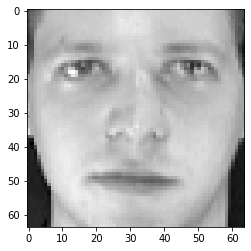

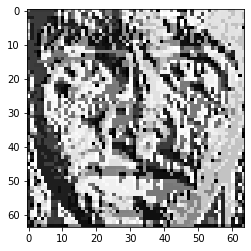

[[120  56  56 ... 224 224 224]
 [ 60  60  60 ... 227 225 193]
 [ 30  28  60 ... 225 227 195]
 ...
 [  0 185   0 ... 223  30   0]
 [ 62  13 146 ... 255  46   3]
 [ 14   6 143 ...  13   6 131]]
LBP Program is finished
(64, 64)
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[2 3 4 5]
NUM
60
where_img01_vector
[1 4 5 6]
NUM
114
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[1 2 5 6]
NUM
102
where_img01_vector
[0 1 2 3 4 5 6 7]
NUM
255
where_img01_vector
[0 2 3 4 5]
NUM
61
where_img01_vector
[4 5 6]
NUM
112
where_img01_vector
[0 4 5 6 7]
NUM
241
where_img01_vector
[1 3 4 5 6 7]
NUM
250
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5]
NUM
56
where_img01_vector
[3 4 5 6 7]
NUM
248
where_img01_vector
[4 5]
NUM
48
where_img01_vector
[4 5 6 7]
NUM
240
where_img01_vector
[1 2 3 4 5 

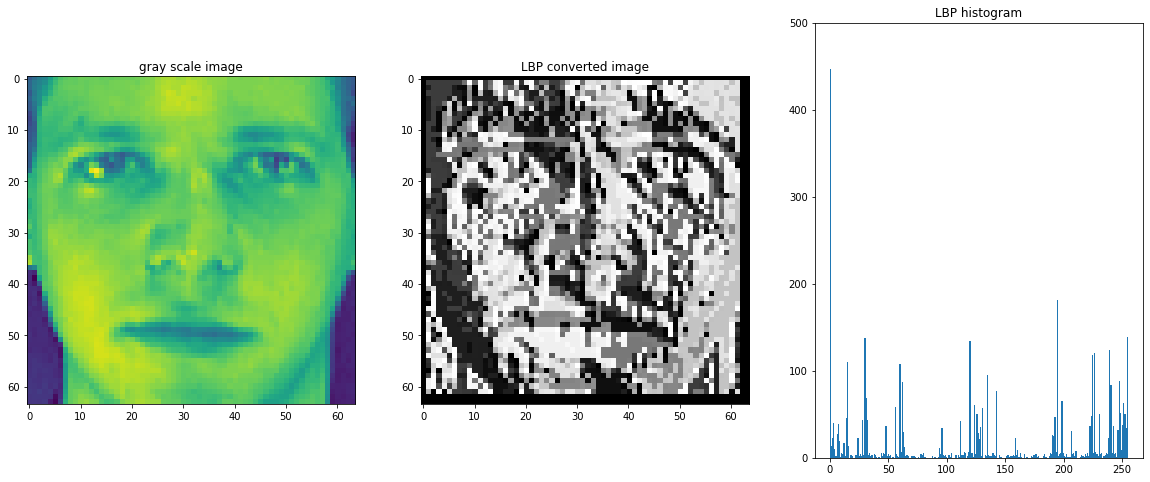

[0.03222656 0.01098633 0.00146484 0.0065918  0.01367188 0.00244141
 0.0078125  0.02148438 0.00097656 0.         0.         0.00073242
 0.00830078 0.00048828 0.01000977 0.02880859 0.01147461 0.00219727
 0.00024414 0.00146484 0.00146484 0.00024414 0.00048828 0.00048828
 0.00854492 0.00073242 0.00048828 0.00073242 0.02441406 0.00170898
 0.02514648 0.0234375  0.00097656 0.         0.         0.
 0.         0.         0.00024414 0.00024414 0.         0.
 0.         0.         0.00048828 0.         0.         0.
 0.00732422 0.00097656 0.00024414 0.00024414 0.00170898 0.00024414
 0.00048828 0.         0.01293945 0.00024414 0.00024414 0.00024414
 0.04833984 0.00048828 0.01342773 0.00756836 0.01904297 0.0012207
 0.         0.00146484 0.00390625 0.00073242 0.00170898 0.0012207
 0.00024414 0.         0.         0.         0.00024414 0.
 0.00048828 0.00048828 0.00097656 0.00024414 0.00024414 0.
 0.00048828 0.         0.         0.         0.00195312 0.00024414
 0.         0.00024414 0.00097656 0. 

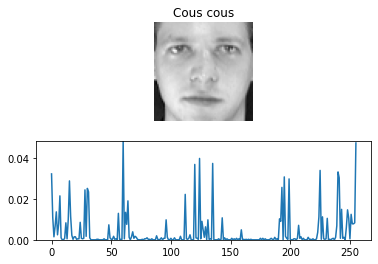

4787


In [1]:
from ipynb.fs.full.functions_secondaparte import *
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
import operator

In [2]:
def truncate(number: float, digits: int) -> float:
    pow10 = 10 ** digits
    return number * pow10 // 1 / pow10

Graph with 4 nodes and 3 edges


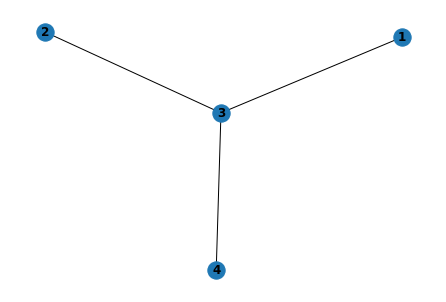

In [3]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
#G = nx.random_geometric_graph(200, 0.125)
m = [1, 2, 3, 4]
G.add_nodes_from(m)
#G.add_edge(2, 3)
#G.add_edge(3, 4)
#G.add_edge(3, 1)
G.add_edges_from([(2, 3), (3, 4), (3, 1)])
nx.draw(G, with_labels=True, font_weight='bold')
#e = (2, 3)
#G.add_edge(*e)
#G.clear()  # unpack edge tuple*
print(G)

In [4]:
similarityMatrix = createSimilarityMatrix('HOG', 'soggetto')

HOG
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39']
[array([0.28321082, 0.10663195, 0.08072711, ..., 0.04903915, 0.10118795,
       0.14536537]), array([0.3098579 , 0.10496397, 0.05921476, ..., 0.04093335, 0.07550864,
       0.1429913 ]), array([0.2974024 , 0.10383666, 0.06895002, ..., 0.03937106, 0.07974439,
       0.12870083]), array([0.31694175, 0.1196924 , 0.0637441 , ..., 0.04705948, 0.08741514,
       0.15727276]), array([0.32077464, 0.11390864, 0.06571554, ..., 0.03773756, 0.07263743,
       0.13532672]), array([0.30537497, 0.10473273, 0.05674065, ..., 0.03578705, 0.07638619,
       0.14201219]), array([0.31133249, 0.09326633, 0.05214979, ..., 0.03875541, 0.07708643,
       0.1566328 ]), array([0.33268281, 0.11117169, 0.05669145, ..., 0.03417831, 0.06387914,
       0.12890729]), array([0.31887448, 0

In [5]:
def createGraph(similarityMatrix, n, m):
    G = nx.Graph()
    listOfSubject = list(range(0,39+1))

    print(listOfSubject)

    G.add_nodes_from(listOfSubject)

    for i in range(len(similarityMatrix)):
        similarityOfSubject = similarityMatrix[i]
        
        listOfSimilarity = []
        for j in range(len(similarityOfSubject)):
            pair = (j, similarityOfSubject[j])
            listOfSimilarity.append(pair)
        
        del listOfSimilarity[i]

        sequenzaOrdinata = sorted(listOfSimilarity, key=lambda x: x[1], reverse=True)

        # print(sequenzaOrdinata)
        # print("\n")

        for k in range(n):
            G.add_edge(i, sequenzaOrdinata[k][0])

    return G
        #[(0, 0.33), (1, 0.45), ...., (40, 0.99)]

In [6]:
m = 10
graph = createGraph(similarityMatrix, 5, m)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]


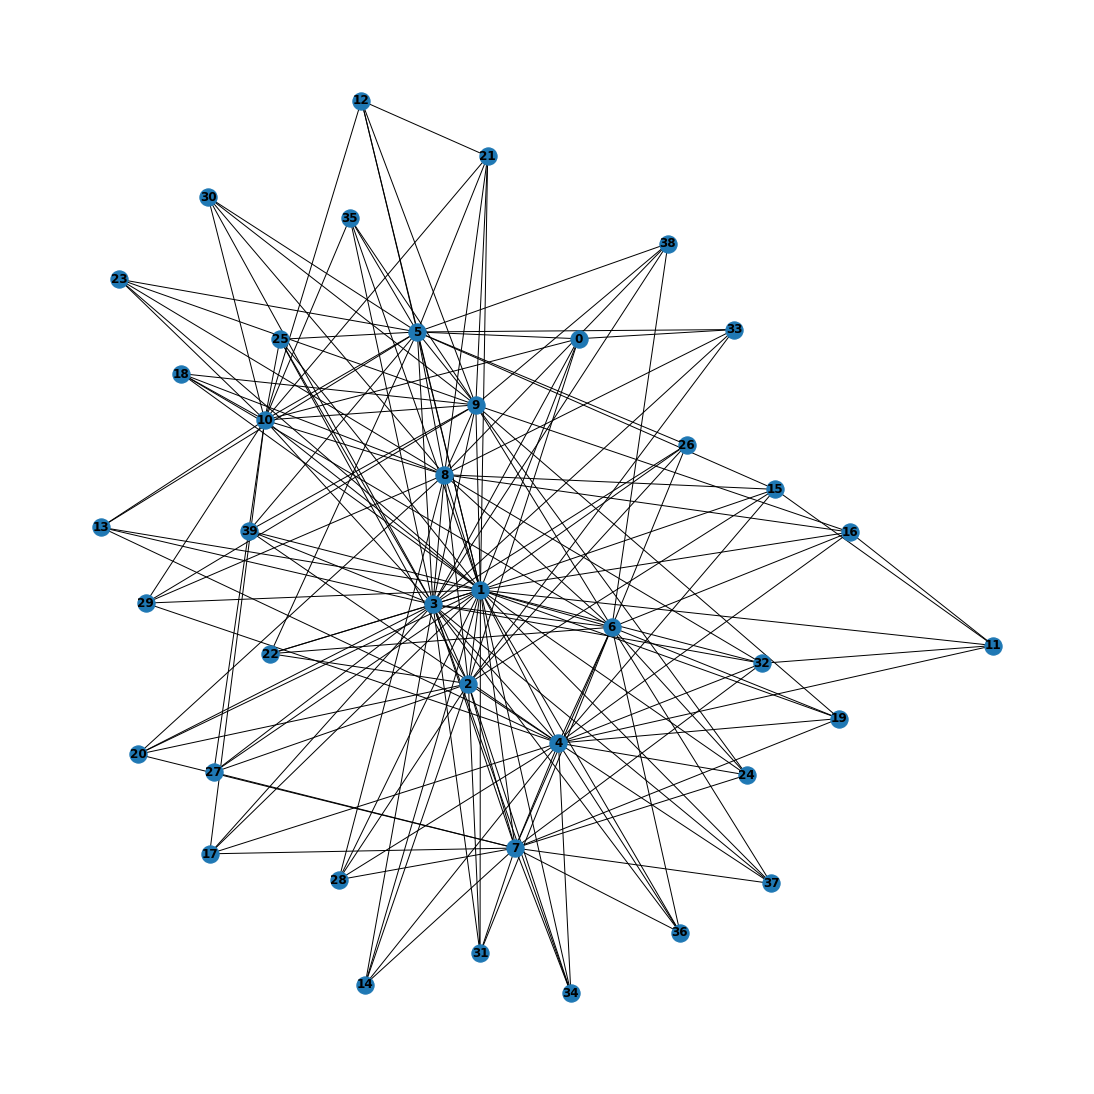

In [7]:
# larger figure size
plt.figure(3,figsize=(15,15)) 
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show()

In [8]:
print("STAMPA DEGLI ARCHI DEL GRAFO")
print(list(graph.edges))

STAMPA DEGLI ARCHI DEL GRAFO
[(0, 2), (0, 1), (0, 3), (0, 5), (0, 10), (0, 33), (1, 3), (1, 4), (1, 9), (1, 6), (1, 8), (1, 2), (1, 5), (1, 7), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 31), (1, 32), (1, 34), (1, 35), (1, 36), (1, 37), (1, 39), (2, 3), (2, 4), (2, 7), (2, 8), (2, 14), (2, 15), (2, 20), (2, 22), (2, 25), (2, 26), (2, 27), (2, 28), (2, 31), (2, 33), (2, 34), (3, 6), (3, 7), (3, 5), (3, 8), (3, 4), (3, 9), (3, 10), (3, 13), (3, 14), (3, 17), (3, 20), (3, 22), (3, 25), (3, 26), (3, 27), (3, 30), (3, 31), (3, 32), (3, 33), (3, 34), (3, 35), (3, 36), (3, 37), (3, 38), (3, 39), (4, 7), (4, 6), (4, 11), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 19), (4, 24), (4, 28), (4, 29), (4, 32), (4, 34), (4, 36), (4, 37), (4, 39), (5, 10), (5, 9), (5, 8), (5, 12), (5, 13), (5, 15), (5, 21), (5, 22), (5, 23), (5, 25), (5, 26), (5, 30), (5, 33

In [9]:
result = pagerank(graph)

In [10]:
sorted_result = sorted(result.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in ascending order by value : ',sorted_result)

Dictionary in ascending order by value :  [(1, 0.09189462214392771), (3, 0.07169150749248568), (4, 0.05269112774746963), (5, 0.05003432029414389), (8, 0.04945120599245935), (9, 0.04728056753998969), (7, 0.045070816147774403), (2, 0.04501726175334633), (10, 0.044990613735237175), (6, 0.04223462250433685), (15, 0.017511403616700675), (16, 0.017498547465203275), (32, 0.01745205507690276), (21, 0.017421256601993406), (0, 0.017400905259500325), (11, 0.01559114071658748), (12, 0.015108498860016287), (33, 0.015093138624342702), (19, 0.014889302357476635), (24, 0.014889302357476635), (28, 0.01487605298386267), (30, 0.014859463781840217), (18, 0.014858180071281497), (29, 0.014853855794861807), (38, 0.014853636724230429), (23, 0.014852856665385123), (27, 0.014850278130511305), (31, 0.014844451072901516), (14, 0.014840126796481824), (34, 0.014840126796481824), (17, 0.014838792337569039), (25, 0.014835110035398058), (36, 0.01483296527995925), (37, 0.01483296527995925), (22, 0.01482928297778827), (

In [11]:
firstM = sorted_result[0:m]

In [12]:
firstM

[(1, 0.09189462214392771),
 (3, 0.07169150749248568),
 (4, 0.05269112774746963),
 (5, 0.05003432029414389),
 (8, 0.04945120599245935),
 (9, 0.04728056753998969),
 (7, 0.045070816147774403),
 (2, 0.04501726175334633),
 (10, 0.044990613735237175),
 (6, 0.04223462250433685)]

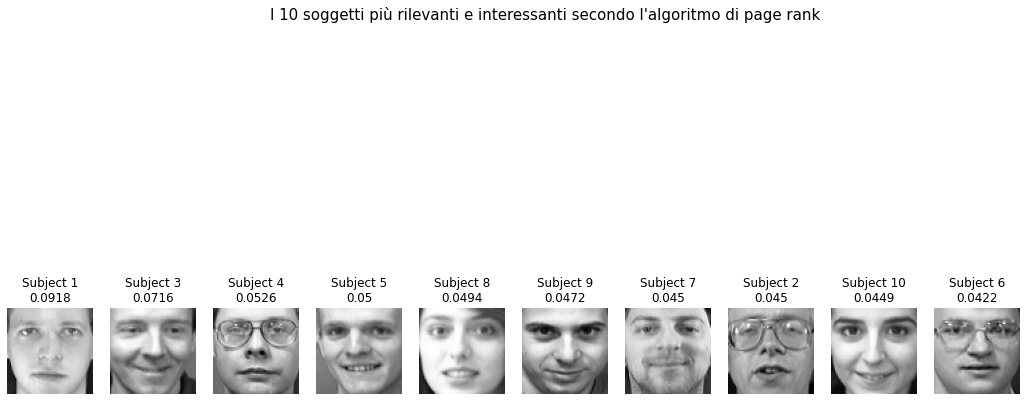

In [13]:

import math
# numero di immagini simili che vogliamo ottenere
k = 5

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

fig = plt.figure(figsize=(20, 10))
fig.suptitle('I ' + str(m) + ' soggetti più rilevanti e interessanti secondo l\'algoritmo di page rank ', fontsize=15)
# plt.axis('off')
currentIndex = 1

for j in range(len(firstM)):
    imageName = 'image-original-' + str(firstM[j][0]) + '-1.png'
    # load the image
    image = Image.open('./secondaparte/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Subject ' + str(firstM[j][0]) + "\n" +
              str(truncate(firstM[j][1],4)))

    currentIndex += 1

plt.show()
